# SCRIPTS

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

## Limpieza de data

In [77]:
def mostrar_outliers(data,columna):
  # Calcular el rango intercuartílico (IQR)
  Q1 = data[columna].quantile(0.25)
  Q3 = data[columna].quantile(0.75)
  IQR = Q3 - Q1
  # Calcular los límites para detectar outliers
  lower_limit = Q1 - 1.5 * IQR
  upper_limit = Q3 + 1.5 * IQR
  # Filtrar outliers
  outliers = data[(data[columna] < lower_limit) | (data[columna] > upper_limit)]
  return outliers
#mostrar_outliers(tudata,"columna")

In [78]:
def eliminar_outliers(data, columna):
    # Calcular el rango intercuartílico (IQR)
    Q1 = data[columna].quantile(0.25)
    Q3 = data[columna].quantile(0.75)
    IQR = Q3 - Q1
    # Calcular los límites para detectar outliers
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    # Filtrar outliers y devolver el DataFrame sin outliers
    data_sin_outliers = data[(data[columna] >= lower_limit) & (data[columna] <= upper_limit)]
    return data_sin_outliers
#nuevo_dataframe = eliminar_outliers(demoras, 'IntervaloTiempo')

In [106]:
def visualizar_variable(data,columna):
    plt.scatter(range(len(data)), data[columna])
    plt.xlabel("Índice")
    plt.ylabel("Valores")
    plt.show()
#visualizar_variable(data,"humedad_suelo")

## Entendimiento de la data

In [96]:
def grafica_dispersion(data,columna1,columna2,etiqueta1,etiqueta2):
    plt.plot(data[columna1], data[columna2], "o")
    plt.xlabel(etiqueta1)
    plt.ylabel(etiqueta2)
    plt.show()
#grafica_dispersion(data,"temperatura","humedad","temperatura","humedad")

In [80]:
def graficar_boxplot(data, columna=None):
    if columna:
        fig, ax = plt.subplots(figsize=(8, 6))
        data[columna].plot(kind='box')
        ax.set_title(f'Boxplot de la columna {columna}')
        plt.show()
    else:
        fig = plt.figure(figsize=(16, 20))
        ax = fig.gca()
        (data.rename(columns=lambda x: str(x))
             .plot(ax=ax, kind='box', subplots=True, layout=(6, 5))
        )
        plt.show()
#graficar_boxplot(data, "Y")
#graficar_boxplot(data)

In [81]:
def histograma(data):
  fig = plt.figure(figsize = (20,20))
  ax = fig.gca()
  data.hist(ax=ax)
  plt.show()
#histograma(data)

In [82]:
def diagrama_densidad(data):
  fig = plt.figure(figsize = (20,20))
  ax = fig.gca()
  data.plot(ax=ax, kind='density', subplots=True, layout=(8,8), sharex=False, legend=True)
  plt.show()
#diagrama_densidad(data)

In [83]:
def graficar_correlacion(data):
  correlation = data.corr()
  plt.figure(figsize=(12,12))
  ax = sns.heatmap(correlation, vmax=1, square=True, annot = True, cmap = 'viridis')
  plt.title('Correlación entre variables')
  plt.show()
#graficar_correlacion(data)

# ANÁLISIS

## Diccionario de datos

| Columna|Descripción|Tipo de Datos|Unidades|
|---|---|---|---|
| temperatura	| Temperatura del ambiente | Número decimal | $\textcelsius$|
|humedad|Humedad relativa del ambiente (HR)|Número decimal| %|
|intensidad_luz|Intensidad de luz|Número decimal|lux|
|humedad_suelo|Humedad del suelo|Número decimal||

## Importando data

In [3]:
data = pd.read_csv("data.csv")
data.head(3)

,id,fecha,hora,temperatura,humedad,intensidad_luz,humedad_suelo
0,1,2024-01-28,22:46:29,17.6,65.2,76.67,4.67
1,2,2024-01-28,22:46:33,17.6,65.2,76.67,5.28
2,3,2024-01-28,22:46:37,17.6,65.3,76.67,4.06


In [115]:
# últimas filas
data.tail(3)

,id,fecha,hora,temperatura,humedad,intensidad_luz,humedad_suelo
4115,4116,2024-02-03,22:45:06,20.0,64.5,50.00,-0.67
4116,4117,2024-02-03,22:45:10,20.0,64.4,50.00,-0.67
4117,4118,2024-02-03,22:45:13,20.0,64.5,50.83,-1.03


## Limpieza de data

In [116]:
# Ver en que columnas hay valores nan (Vemos que no hay datos faltantes)
data.isna().any()

id                False
fecha             False
hora              False
temperatura       False
humedad           False
intensidad_luz    False
humedad_suelo     False
dtype: bool

<Axes: >

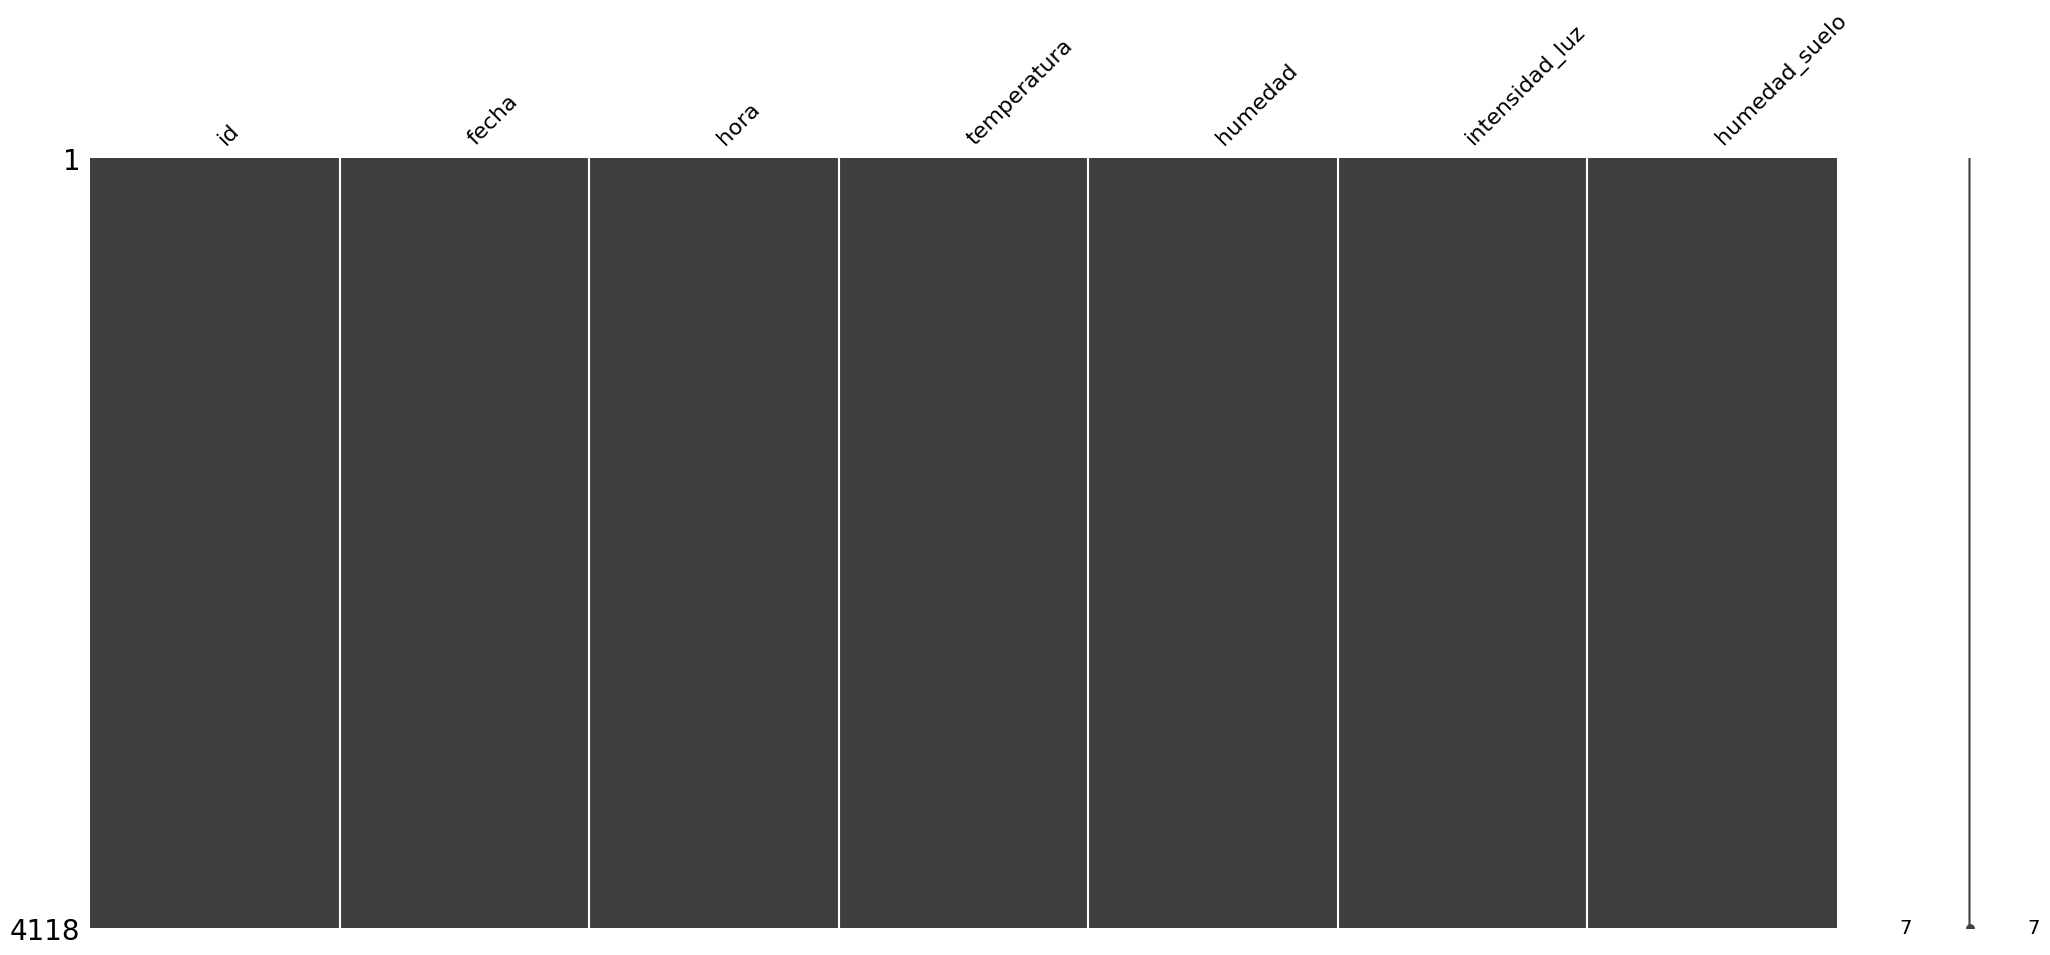

In [117]:
# Se observa que no hay valores nan (valores faltantes)
msno.matrix(data)

In [118]:
# Selecciono las columnas con las que voy a trabajar
data = data[["temperatura","humedad","intensidad_luz","humedad_suelo"]]
data.head(3)

,temperatura,humedad,intensidad_luz,humedad_suelo
0,17.6,65.2,76.67,4.67
1,17.6,65.2,76.67,5.28
2,17.6,65.3,76.67,4.06


In [119]:
# Hay valores igual a 0 o negativos
data[(data["temperatura"]<=0) | (data["humedad"]<=0) | (data["intensidad_luz"]<=0) | (data["humedad_suelo"]<=0)]

,temperatura,humedad,intensidad_luz,humedad_suelo
1340,16.4,66.4,10.00,-0.55
2019,16.8,65.0,11.67,-1.95
2648,15.6,68.1,0.00,11.16
2652,15.8,67.3,0.00,8.49
2653,15.8,67.2,0.00,9.34
...,...,...,...,...
4113,19.9,65.0,50.00,-0.97
4114,19.9,64.8,50.00,-0.55
4115,20.0,64.5,50.00,-0.67
4116,20.0,64.4,50.00,-0.67


In [120]:
# Elimino las filas que tienen valores 0 o negativos
data=data[~((data["temperatura"]<=0) | (data["humedad"]<=0) | (data["intensidad_luz"]<=0) | (data["humedad_suelo"]<=0))]

### Elimino outliers de: **humedad_suelo**

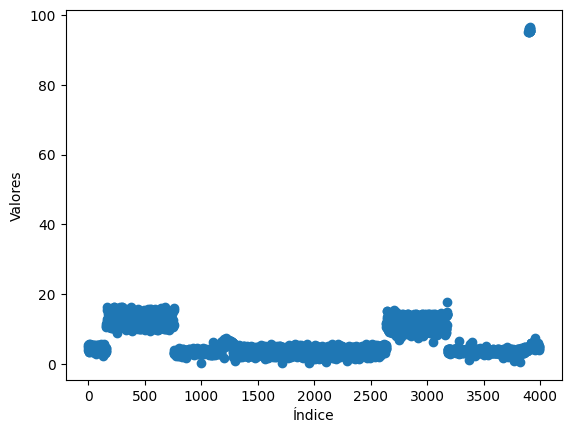

In [121]:
visualizar_variable(data,"humedad_suelo")

In [122]:
outliers_hs = mostrar_outliers(data, "humedad_suelo")
print(outliers_hs.shape)
outliers_hs.head(3)

(18, 4)


,temperatura,humedad,intensidad_luz,humedad_suelo
3940,17.2,65.8,68.33,95.21
3941,17.2,65.2,47.50,96.42
3942,17.2,65.2,48.33,95.21


In [123]:
data = eliminar_outliers(data, "humedad_suelo")

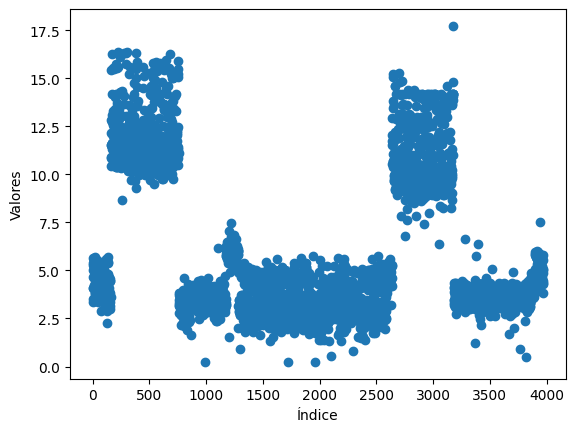

In [124]:
visualizar_variable(data,"humedad_suelo")

## Entendimiento de la data

### Cantidad de datos

In [125]:
data.shape

(3974, 4)

### Tipo de datos

In [126]:
data.dtypes

temperatura       float64
humedad           float64
intensidad_luz    float64
humedad_suelo     float64
dtype: object

## Estadísticas

### Descripción general

In [127]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
temperatura,3974.0,16.675365,0.481863,15.30,16.40,16.60,17.00,17.60
humedad,3974.0,65.667237,0.724456,63.70,65.10,65.60,66.20,68.70
intensidad_luz,3974.0,22.418749,17.047591,0.83,10.83,20.83,22.50,99.17
humedad_suelo,3974.0,5.804577,3.727497,0.24,3.15,3.82,9.65,17.72


### Diagrama de dispersión por pares

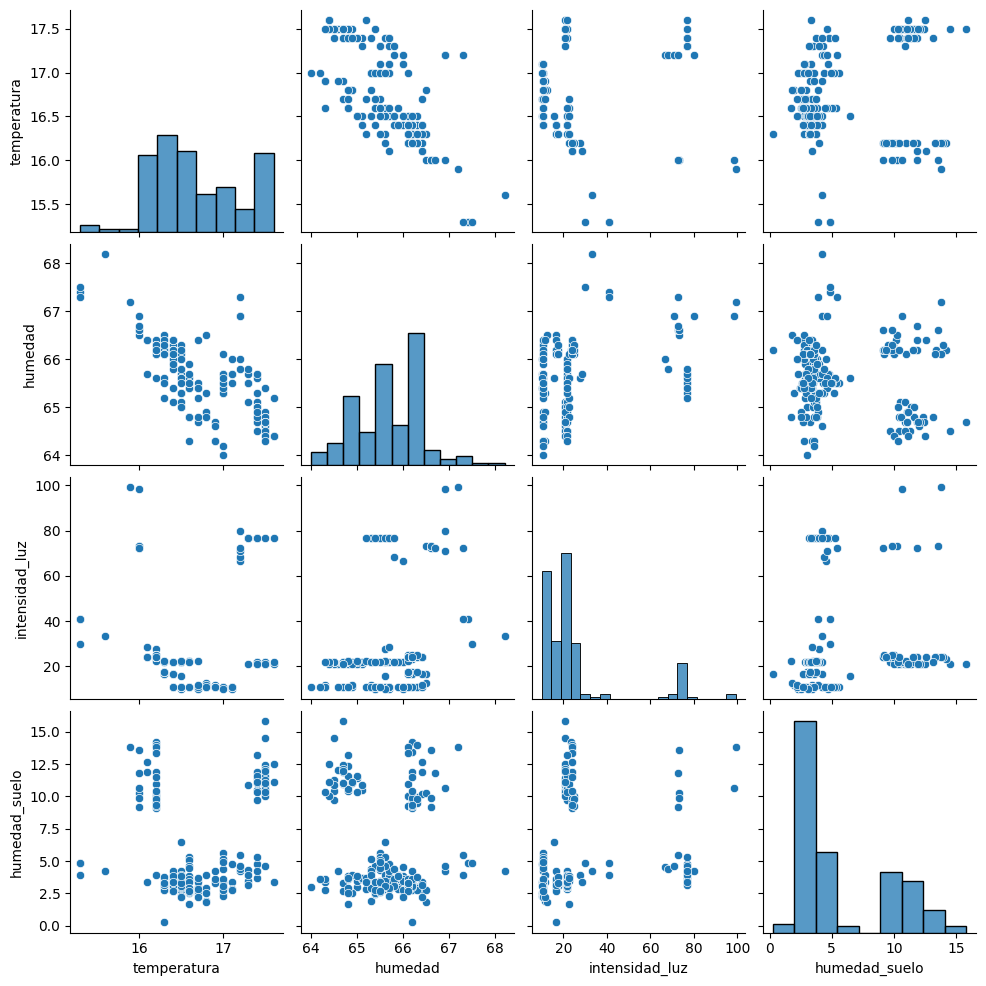

In [128]:
sns.pairplot(data.sample(200))
plt.show()

## Visualización del conjunto de datos

### Gráficos univariados

#### Boxplots

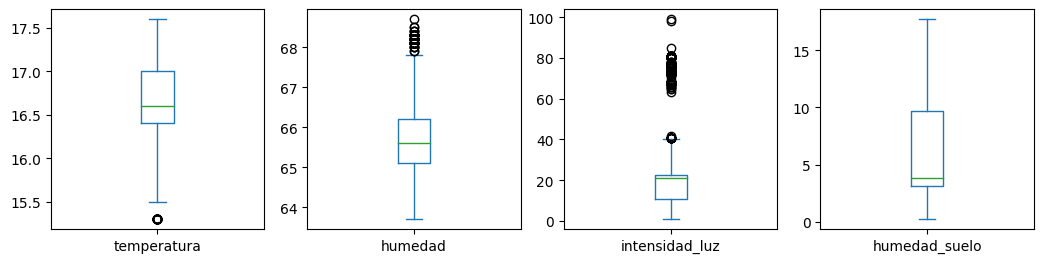

In [129]:
# Boxplot de todas las columnas
graficar_boxplot(data)

#### Histograma

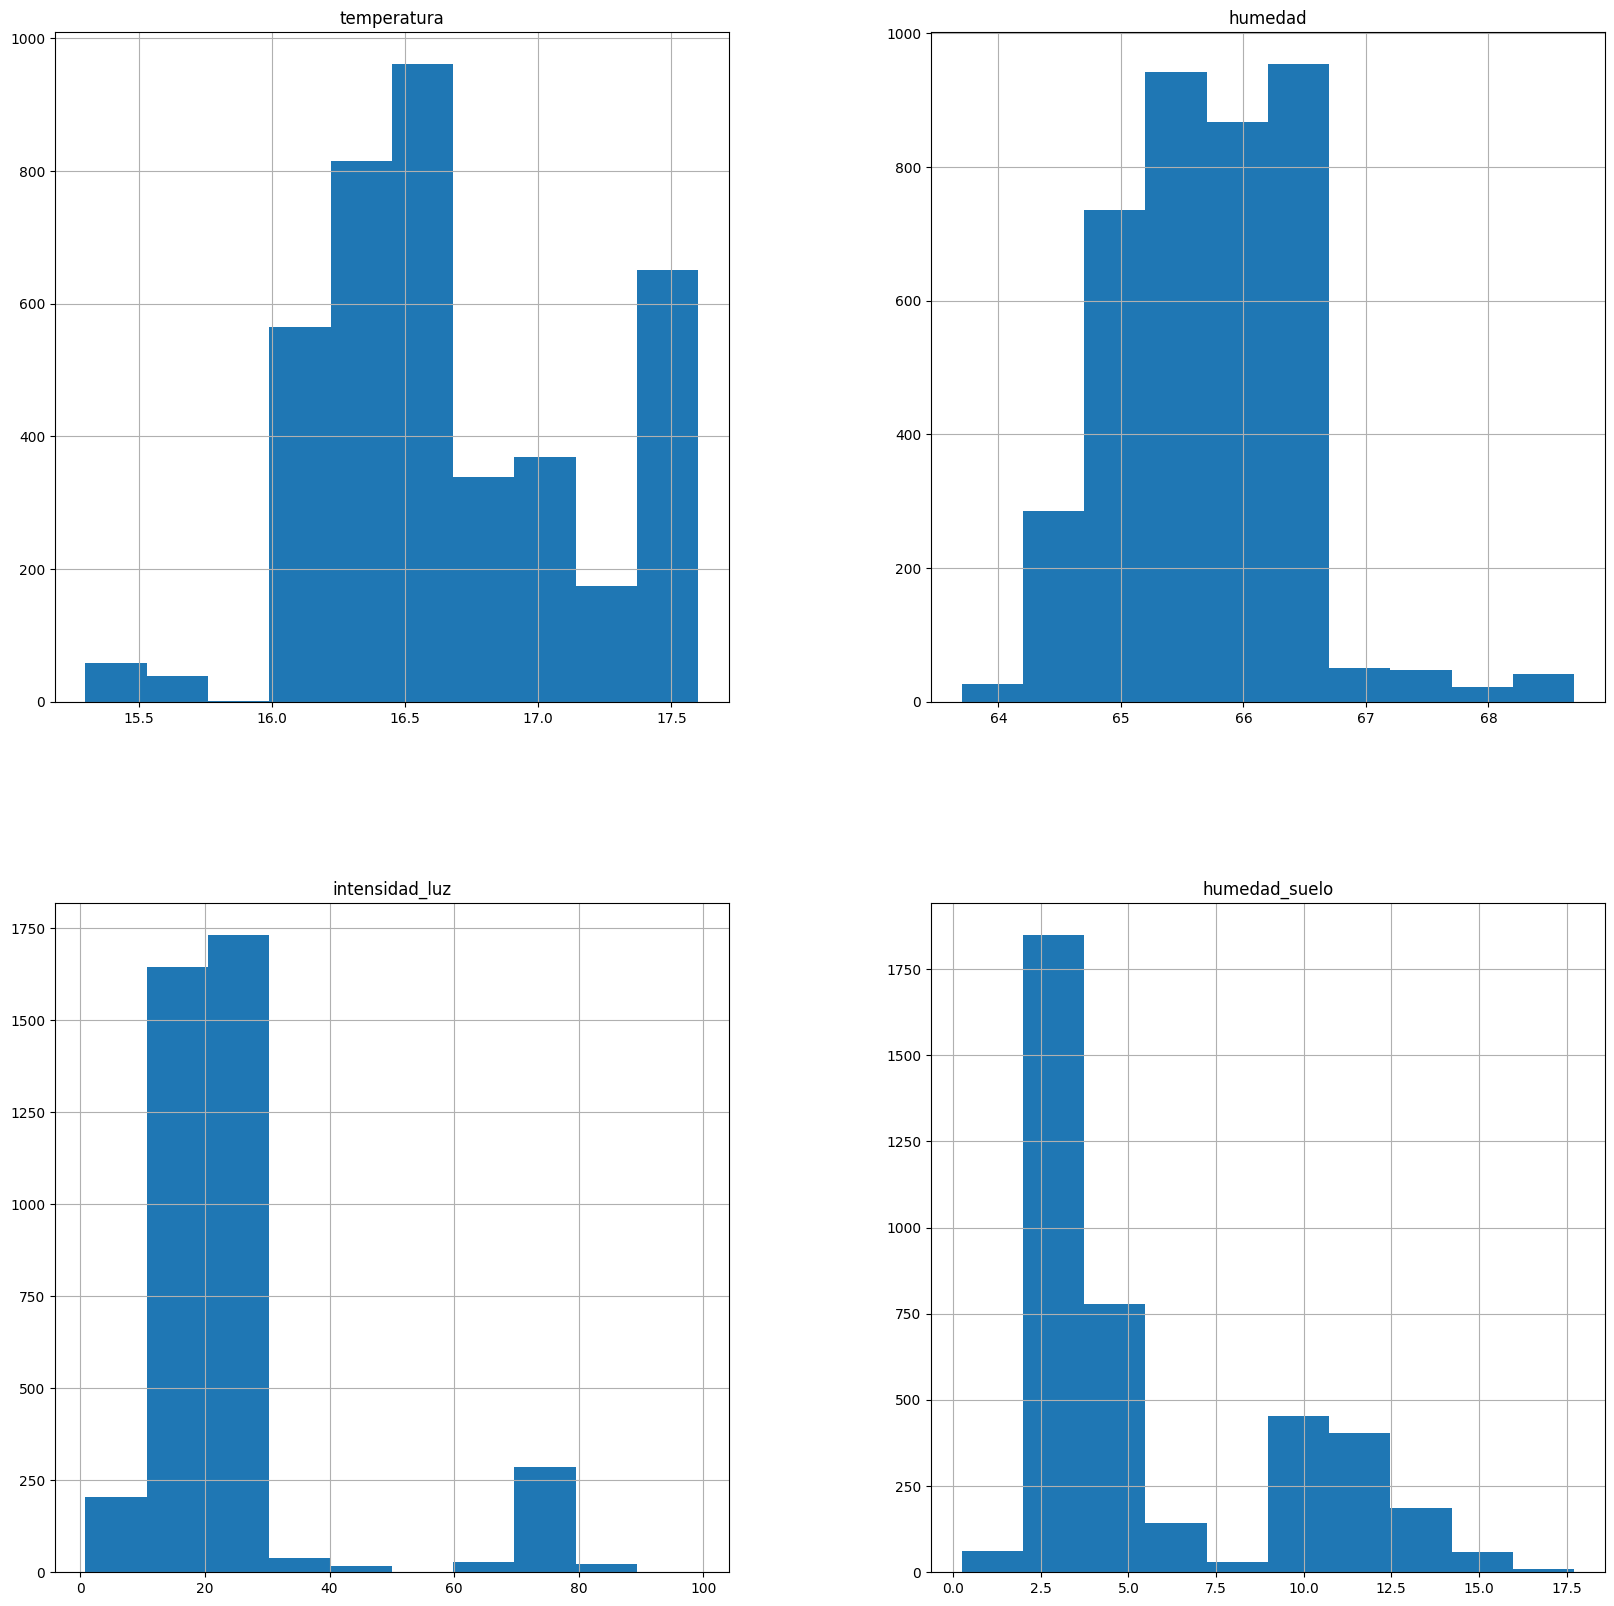

In [130]:
histograma(data)

#### Diagrama de densidad

Util para ver si tienen una distribución sesgada.

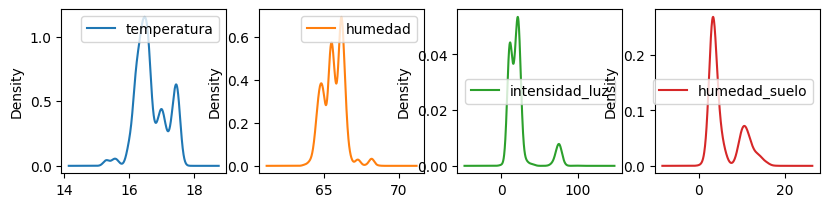

In [131]:
diagrama_densidad(data)

### Gráficos multivariados

#### Correlación entre atributos

* Este gráfico nos permite ver de forma visual la correlación entre los atributos.
* El amarilo alrededor de la diagonal sugiere que los atributos que están uno al lado del otro generalmente están más correlacionados entre sí. 
* Una buena práctica es tomar el valor de 0.7 o -0.7 entre dos atributos o variables para decir que tienen una fuerte correlación o relación.

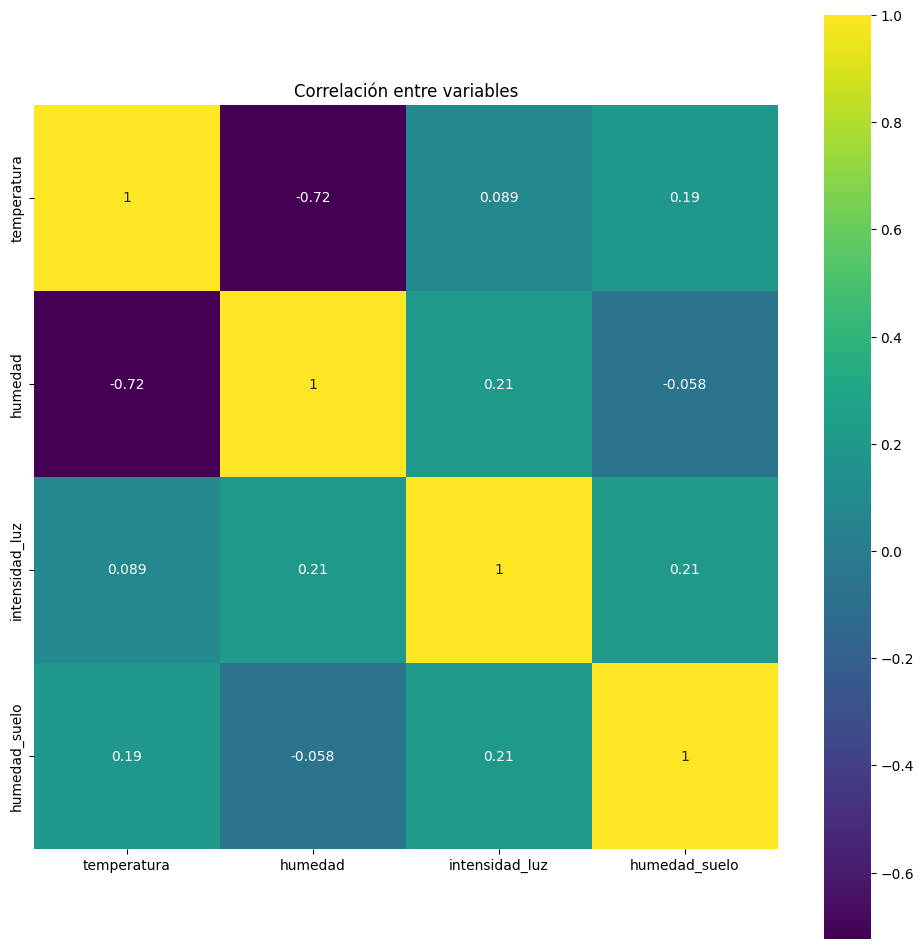

In [86]:
graficar_correlacion(data)

In [133]:
data.head(5)

,temperatura,humedad,intensidad_luz,humedad_suelo
0,17.6,65.2,76.67,4.67
1,17.6,65.2,76.67,5.28
2,17.6,65.3,76.67,4.06
3,17.6,65.3,76.67,5.64
4,17.6,65.2,76.67,3.34
